<a href="https://colab.research.google.com/github/Idan-Alter/OU-22961-Deep-Learning/blob/main/22961_2_2_4_single_layer_training_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import torch
import torchvision
from torch.utils.data import DataLoader
from tqdm import tqdm

train_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=True, download=True,
    transform=torchvision.transforms.ToTensor())

In [18]:
from torch import nn
model = nn.Sequential(
          nn.Linear(784,10),    #z
          nn.LogSoftmax(dim=1)  #log(y)
          )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=10, bias=True)
  (1): LogSoftmax(dim=1)
)


In [19]:
CE_loss   = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [20]:
def iterate_batch(imgs, labels):
  imgs = imgs.flatten(start_dim=1)
  optimizer.zero_grad()
  y_model = model(imgs)
  
  loss = CE_loss(y_model,labels)
  loss.backward()
  optimizer.step()
  
  predicted_labels = y_model.argmax(dim=1)
  acc = (predicted_labels == labels).sum() / len(labels)
  return loss.detach(), acc.detach()

In [21]:
train_dataloader = DataLoader(
    train_data_transformed, batch_size=256, shuffle=True)
batches = len(train_dataloader)
loss = torch.zeros(batches)
acc  = torch.zeros(batches)
for idx, (imgs, labels) in enumerate(train_dataloader):
    loss[idx], acc[idx] = iterate_batch(imgs, labels)

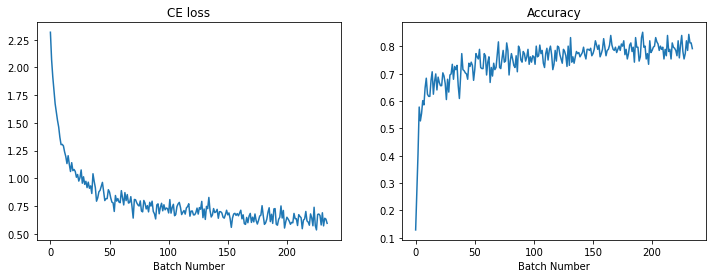

In [22]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(batches), loss);
plt.title("CE loss");
plt.xlabel("Batch Number");
plt.subplot(1,2,2)
plt.plot(range(batches), acc);
plt.title("Accuracy");
plt.xlabel("Batch Number");

#Train vs Test 

In [23]:
test_data_transformed = torchvision.datasets.FashionMNIST(
    root="/22961", train=False, download=True,
    transform=torchvision.transforms.ToTensor())
test_dataloader = DataLoader(
    test_data_transformed, batch_size=1024)

In [24]:
def eval_model_test():
  loss = 0.
  acc  = 0.
  test_batches = len(test_dataloader)
  for imgs, labels in test_dataloader:
    imgs = imgs.flatten(start_dim=1)
    with torch.no_grad():
      y_model = model(imgs) 
      loss   += CE_loss(y_model, labels)
      predicted_labels = y_model.argmax(dim=1)
      acc += (predicted_labels == labels).sum() / len(labels)
  return loss/test_batches, acc/test_batches

In [25]:
eval_model_test()

(tensor(0.6315), tensor(0.7898))

In [26]:
def iterate_epoch():
    running_loss = 0.
    running_acc  = 0.
    for batch_idx, (imgs, labels) in enumerate(train_dataloader):
      batch_loss, batch_acc = iterate_batch(imgs, labels)
      running_loss += batch_loss
      running_acc  += batch_acc
    loss = running_loss/batches
    acc  = running_acc/batches
    return loss, acc

In [27]:
epochs=10
batches    = len(train_dataloader)
loss_train = torch.zeros(epochs)
acc_train  = torch.zeros(epochs)
loss_test  = torch.zeros(epochs)
acc_test   = torch.zeros(epochs)

model[0].reset_parameters()
for epoch_idx in tqdm(range(epochs)):
  loss_train[epoch_idx], acc_train[epoch_idx] = iterate_epoch()
  loss_test[epoch_idx],  acc_test[epoch_idx]  = eval_model_test()

100%|██████████| 10/10 [01:58<00:00, 11.84s/it]


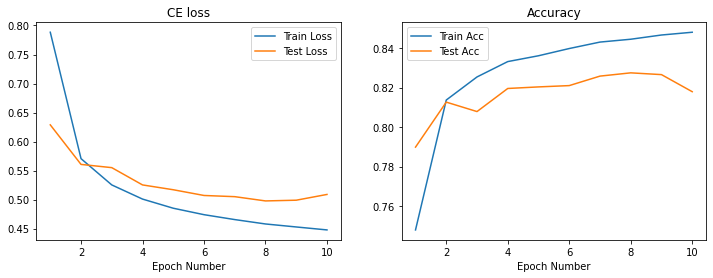

In [28]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1), loss_train, label="Train Loss");
plt.plot(range(1,epochs+1), loss_test, label="Test Loss");
plt.title("CE loss");
plt.legend()
plt.xlabel("Epoch Number");
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1), acc_train, label="Train Acc");
plt.plot(range(1,epochs+1), acc_test, label="Test Acc");
plt.title("Accuracy");
plt.legend()
plt.xlabel("Epoch Number");

#Deep Network

In [29]:
model = nn.Sequential(
          nn.Linear(784,100),
          nn.ReLU(),
          nn.Linear(100,10),
          nn.ReLU(),
          nn.Linear(10,10),
          nn.ReLU(),
          nn.Linear(10,10),  
          nn.LogSoftmax(dim=1)  
          )
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): ReLU()
  (4): Linear(in_features=10, out_features=10, bias=True)
  (5): ReLU()
  (6): Linear(in_features=10, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


In [30]:
def reset_model_params():
  for layer in model.children():
    if hasattr(layer, 'reset_parameters'):
      layer.reset_parameters()

In [31]:
epochs     = 5
batches    = len(train_dataloader)
loss_train = torch.zeros(epochs)
acc_train  = torch.zeros(epochs)
loss_test  = torch.zeros(epochs)
acc_test   = torch.zeros(epochs)


reset_model_params()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
for epoch_idx in tqdm(range(epochs)):
  loss_train[epoch_idx], acc_train[epoch_idx] = iterate_epoch()
  loss_test[epoch_idx],  acc_test[epoch_idx] = eval_model_test()

100%|██████████| 5/5 [01:01<00:00, 12.34s/it]


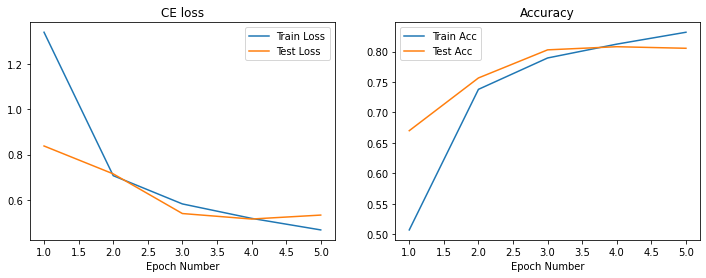

In [32]:
from matplotlib import pyplot as plt
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(1,epochs+1), loss_train, label="Train Loss");
plt.plot(range(1,epochs+1), loss_test, label="Test Loss");
plt.title("CE loss");
plt.legend()
plt.xlabel("Epoch Number");
plt.subplot(1,2,2)
plt.plot(range(1,epochs+1), acc_train, label="Train Acc");
plt.plot(range(1,epochs+1), acc_test, label="Test Acc");
plt.title("Accuracy");
plt.legend()
plt.xlabel("Epoch Number");